<center><H1><b> Анализ данных с сайта OBI</b></H1>



In [491]:
#загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [492]:
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## 1. Описание, анализ и визуализация данных:

In [579]:
df = pd.read_csv('2019-10-03_obi.csv', sep=';', encoding='cp1251', header=1)
df.head()

,Категория,Код,Название,Производитель,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления,Регион
0,Сад и досуг/Растения и семена/Кустарники/Жасмин,1003904,Жасмин Полиантум D12 H35,7 ЦВЕТОВ,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 19:56,Санкт-Петербург
1,Сад и досуг/Растения и семена/Кустарники/Жасмин,1003904,Жасмин Полиантум D12 H35,7 ЦВЕТОВ,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 19:56,Москва
2,Сад и досуг/Горшки и садовый декор/Горшки/Улич...,1004373,"Горшок Terraplast пластик ""Фарнесе"" терракотов...",T.Plast,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 19:02,Санкт-Петербург
3,Сад и досуг/Горшки и садовый декор/Горшки/Улич...,1004373,"Горшок Terraplast пластик ""Фарнесе"" терракотов...",T.Plast,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 19:02,Москва
4,Сад и досуг/Горшки и садовый декор/Горшки/Улич...,1004449,"Блюдце Terraplast пластик ""Санремо"" терракотов...",T.Plast,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 19:02,Санкт-Петербург


In [580]:
df.loc[df['Производитель'].fillna('Unknown') == 'Unknown', :]

,Категория,Код,Название,Производитель,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления,Регион
46,Стройка/Строительные материалы/Строительный ин...,1053156,Пленка пароизоляционная строительная Ондутис R...,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 21:25,Санкт-Петербург
47,Стройка/Строительные материалы/Строительный ин...,1053156,Пленка пароизоляционная строительная Ондутис R...,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 21:25,Москва
98,Техника/Аксессуары для автомобиля/Аксессуары д...,1100734,Адаптер универсальный дорожный,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 23:16,Санкт-Петербург
99,Техника/Аксессуары для автомобиля/Аксессуары д...,1100734,Адаптер универсальный дорожный,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 23:16,Москва
100,Всё для дома/Освещение/Внутреннее освещение/Но...,1100825,Ночник Duewi с датчиком движения 0.2 Вт,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 15:55,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...
104445,Всё для дома/Обои/Флизелиновые обои,4452389,"Обои компакт-винил Lagom 369392 серые 1,06х10,...",NaN,"2299,00","0,00",В наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 22:45,Москва
104446,Всё для дома/Обои/Флизелиновые обои,4452397,"Обои компакт-винил Unique 361123 бежевые 1,06х...",NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 22:45,Санкт-Петербург
104447,Всё для дома/Обои/Флизелиновые обои,4452397,"Обои компакт-винил Unique 361123 бежевые 1,06х...",NaN,"1749,00","0,00",В наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 22:45,Москва
104511,Стройка/Принадлежности для укладки плитки/Клеи...,4459855,Клей для керамической плитки БИРСMIX 25 кг,NaN,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 22:12,Санкт-Петербург


В рассмотрении имеются следующие поля:
- Категория товара
- Код товара
- Название товара
- Производитель товара
- Цена товара (обновленная)
- Старая цена товара
- Наличие товара в магазине (на складе)
- Ссылка на товар
- Дата обновления информации
- Регион (Город)

Некоторые признаки для дальнейшего анализа нам не понадобятся, и они освободят нам некоторую память. Например, это ссылка на товар и дата обновления. 

Часть признаков необходимо превратить в бинарные и числовые, еще часть из них - предобработать (например, категории).

In [582]:
df.loc[df['Регион'] == 'Санкт-Петербург', 'Наличие'].value_counts()

Нет в наличии    52260
В наличии            1
Name: Наличие, dtype: int64

In [583]:
df.loc[(df['Регион'] == 'Санкт-Петербург') & (df['Наличие'] == 'В наличии'), :]

,Категория,Код,Название,Производитель,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления,Регион
73968,Техника/Электротовары/Кабель и монтаж/Трубы го...,4069761,Труба гофрированная ПНД T.plast с зондом 20 мм...,T.Plast,"199,00","0,00",В наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 07:35,Санкт-Петербург


In [830]:
df.loc[0, 'Категория']

'Сад и досуг/Растения и семена/Кустарники/Жасмин'

In [584]:
df[df['Код'] == 4069761]

,Категория,Код,Название,Производитель,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления,Регион
73968,Техника/Электротовары/Кабель и монтаж/Трубы го...,4069761,Труба гофрированная ПНД T.plast с зондом 20 мм...,T.Plast,"199,00","0,00",В наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 07:35,Санкт-Петербург
73969,Техника/Электротовары/Кабель и монтаж/Трубы го...,4069761,Труба гофрированная ПНД T.plast с зондом 20 мм...,T.Plast,"0,00","0,00",Нет в наличии,https://www.obi.ru/store/change?storeID=001&re...,02.10.2019 07:35,Москва


In [831]:
df.loc[df['Регион'] == 'Санкт-Петербург', 'Наличие'].value_counts()

Нет в наличии    52260
В наличии            1
Name: Наличие, dtype: int64

Удивительно, что в Питере всего одна позиция в наличии. Позже подумаю, что дальше делать с этим

In [586]:
dt = df.copy()
dt.drop(['Ссылка на товар', 'Дата обновления'], axis=1, inplace=True)

In [587]:
dt.isna().sum()

Категория            0
Код                  0
Название             0
Производитель    21798
Цена                 0
Старая цена          0
Наличие              0
Регион               0
dtype: int64

In [588]:
dt.duplicated().sum()

0

In [589]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104527 entries, 0 to 104526
Data columns (total 8 columns):
Категория        104527 non-null object
Код              104527 non-null int64
Название         104527 non-null object
Производитель    82729 non-null object
Цена             104527 non-null object
Старая цена      104527 non-null object
Наличие          104527 non-null object
Регион           104527 non-null object
dtypes: int64(1), object(7)
memory usage: 6.4+ MB


В некоторых местах, где не указан производитель, его можно найти в графе "Название". Однако, встречается он там не везде, а вычленять проблемно, поэтому мы заполним все пустые значения одинаково

In [590]:
dt.fillna('Unknown', inplace = True)

In [591]:
def len_cat(row):
    return len(row['Категория'].split('/'))

In [592]:
dt['cat_length'] = dt.apply(len_cat, axis=1)

In [593]:
dt.cat_length.value_counts()

4    45174
3    35615
5    22634
2     1056
6       48
Name: cat_length, dtype: int64

Я предлагаю разбить товары по подкатегориям

In [594]:
def choose_category_0(row):
    return str(row['Категория']).split('/')[0]


def choose_category_1(row):
    try:
        return str(row['Категория']).split('/')[1]
    except:
        return '-'
    

def choose_category_2(row):
    try:
        return str(row['Категория']).split('/')[2]
    except:
        return '-'
    
    
def choose_category_3(row):
    try:
        return str(row['Категория']).split('/')[3]
    except:
        return '-'
    

def choose_category_4(row):
    try:
        return str(row['Категория']).split('/')[4]
    except:
        return '-'

def choose_category_5(row):
    try:
        return str(row['Категория']).split('/')[5]
    except:
        return '-'

In [595]:
dt['Category 1'] = dt.apply(choose_category_0, axis=1)
dt['Category 2'] = dt.apply(choose_category_1, axis=1)
dt['Category 3'] = dt.apply(choose_category_2, axis=1)
dt['Category 4'] = dt.apply(choose_category_3, axis=1)
dt['Category 5'] = dt.apply(choose_category_4, axis=1)
dt['Category 6'] = dt.apply(choose_category_5, axis=1)

In [596]:
dt.columns

Index(['Категория', 'Код', 'Название', 'Производитель', 'Цена', 'Старая цена',
       'Наличие', 'Регион', 'cat_length', 'Category 1', 'Category 2',
       'Category 3', 'Category 4', 'Category 5', 'Category 6'],
      dtype='object')

In [597]:
dt = dt[['Category 1', 'Category 2',
         'Category 3', 'Category 4', 'Category 5', 'Category 6', 
         'Код', 'Название', 'Производитель', 'Цена', 'Старая цена',
         'Наличие', 'Регион']]

In [598]:
dt.columns = ['Category_1', 'Category_2',
         'Category_3', 'Category_4', 'Category_5', 'Category_6', 
         'Code', 'Name', 'Brand', 'Price', 'Old_Price',
         'Stock', 'Region']

In [599]:
dt.Stock.value_counts()

Нет в наличии    72947
В наличии        31580
Name: Stock, dtype: int64

In [600]:
dt.Stock.replace('Нет в наличии', 0, inplace=True)
dt.Stock.replace('В наличии', 1, inplace=True)

In [601]:
dt.Region.value_counts()

Москва             52266
Санкт-Петербург    52261
Name: Region, dtype: int64

In [602]:
dt.Region.replace('Москва', 1, inplace=True)
dt.Region.replace('Санкт-Петербург', 0, inplace=True)

In [603]:
dt.Category_1.value_counts()

Сад и досуг       31963
Всё для дома      27934
Техника           23514
Стройка           11032
Ванная комната     8010
Кухня              2074
Name: Category_1, dtype: int64

In [604]:
dt.Brand.value_counts()

Unknown         21798
Без бренда       8614
LUX-TOOLS        5570
7 ЦВЕТОВ         5422
OBI              2526
                ...  
Ecoroll             2
Lelighting          2
INTER DESIGN        2
NOBBY               2
Красная цена        2
Name: Brand, Length: 807, dtype: int64

In [610]:
dt['Price'].replace(',', '.', inplace=True)
dt['Old_Price'].replace(',', '.', inplace=True)

In [634]:
dt.loc[92548, :]

Category_1                                          Сад и досуг
Category_2                                      Садовая техника
Category_3                                      Триммеры и косы
Category_4                       Аккумуляторные триммеры и косы
Category_5                                                    -
Category_6                                                    -
Code                                                    4296901
Name          Аккумуляторный триммер BOSCH EasyGrassCut 18 В...
Brand                                                     BOSCH
Price                                                      0.00
Old_Price                                                  0.00
Stock                                                         0
Region                                                        0
Name: 92548, dtype: object

# Код ниже работает очень долго - осторожно

In [635]:
for i in range(len(dt)):
    dt.loc[i, 'Price'] = dt.loc[i, 'Price'].replace(',', '.')
    dt.loc[i, 'Old_Price'] = dt.loc[i, 'Old_Price'].replace(',', '.')

In [636]:
for col in ['Price', 'Old_Price']:
    dt[col] = dt[col].astype(float)

In [678]:
dt.to_csv('dt.csv')

In [653]:
df_reg = dt.copy()

In [637]:
dt.Price.value_counts()

0.0       70454
299.0       681
199.0       636
499.0       607
399.0       548
          ...  
6539.0        1
4490.0        1
1922.0        1
2272.1        1
1038.0        1
Name: Price, Length: 1653, dtype: int64

In [638]:
dt.sample(5)

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price,Stock,Region
13713,Всё для дома,Напольные покрытия,Линолеум,-,-,-,2666667,Линолеум бытовой Синтерос Весна Neva 1 ширина 3 м,Синтерос,0.0,0.0,0,0
49707,Всё для дома,Текстиль для дома,"Пледы, покрывала и декоративные подушки",-,-,-,3775046,Наволочка декоративная Garden 40х40 см серая,Garden,0.0,0.0,0,0
40307,Сад и досуг,Растения и семена,Кустарники,Другие кустарники,-,-,3616380,"Хоста Фрэнсис Виллиамс C1,7",Unknown,0.0,0.0,0,0
65684,Стройка,Строительные материалы,Сухие смеси и грунтовки,Цемент,-,-,3969573,"Цемент Портландцемент M 500 ЦEM II/А-Ш 42,5Н, ...",Unknown,0.0,0.0,0,1
8695,Сад и досуг,Товары для полива,Переходники и соединители для шлангов,-,-,-,2350908,"Распределитель четырехканальный LUX-TOOLS 1/2""...",LUX-TOOLS,1149.0,0.0,1,1


Преобразовали датасет. Посмотрим на статистику

In [639]:
dt.describe()

,Code,Price,Old_Price,Stock,Region
count,104527.0,104527.0,104527.0,104527.0,104527.0
mean,3561884.4,439.1,7.6,0.3,0.5
std,757406.7,2196.3,272.8,0.5,0.5
min,1003904.0,0.0,0.0,0.0,0.0
25%,3084688.0,0.0,0.0,0.0,0.0
50%,3807153.0,0.0,0.0,0.0,1.0
75%,4105573.0,129.0,0.0,1.0,1.0
max,4459921.0,199990.0,37299.0,1.0,1.0


In [640]:
dt[dt.Stock == 1].describe()

,Code,Price,Old_Price,Stock,Region
count,31580.0,31580.0,31580.0,31580.0,31580.0
mean,3648161.7,1292.1,22.3,1.0,1.0
std,757962.0,3283.8,492.7,0.0,0.0
min,1019363.0,1.0,0.0,1.0,0.0
25%,3313553.8,139.0,0.0,1.0,1.0
50%,3940859.0,379.0,0.0,1.0,1.0
75%,4167336.0,1149.0,0.0,1.0,1.0
max,4452397.0,119990.0,37299.0,1.0,1.0


In [641]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104527 entries, 0 to 104526
Data columns (total 13 columns):
Category_1    104527 non-null object
Category_2    104527 non-null object
Category_3    104527 non-null object
Category_4    104527 non-null object
Category_5    104527 non-null object
Category_6    104527 non-null object
Code          104527 non-null int64
Name          104527 non-null object
Brand         104527 non-null object
Price         104527 non-null float64
Old_Price     104527 non-null float64
Stock         104527 non-null int64
Region        104527 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.4+ MB


In [642]:
print(f'В выборке участвует {dt.shape[0]} товарных позиций')

В выборке участвует 104527 товарных позиций


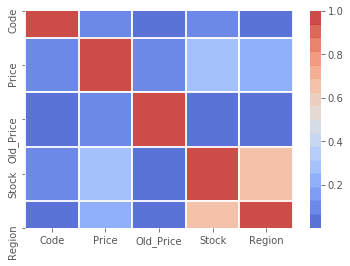

In [643]:
f, ax = plt.subplots()

sns.heatmap(dt.corr(), fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16), alpha=0.9, linewidths=0.9)

In [644]:
dt.sample(5)

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price,Stock,Region
59367,Стройка,Двери и арки,Дверные ручки и аксессуары,-,-,-,3908092,Ручка A Brezza AB PALLADIUM алюминий,PALLADIUM,0.0,0.0,0,0
75246,Всё для дома,Оформление дома,Декоративные поделки,-,-,-,4078499,Набор Гравюра Фантазёр микс А5,Unknown,0.0,0.0,0,0
88324,Сад и досуг,Товары для полива,Искусственные водоёмы,Декор водоёма,-,-,4250775,Фигура декоративная Planet Garden кохаку плава...,Planet Garden,0.0,0.0,0,0
48902,Кухня,Водонагреватели,Водонагреватели накопительные,-,-,-,3764099,Водонагреватель накопительный ELECTROLUX EWH 1...,ELECTROLUX,6999.0,0.0,1,1
4593,Сад и досуг,Растения и семена,Семена и луковицы,Семена цветов,-,-,1860014,Астра Унилюкс Водолей Русский огород,Без бренда,0.0,0.0,0,1


In [645]:
dt_1 = dt[dt.Stock == 1]

In [646]:
dt_1[dt_1['Price'] >0].describe()

,Code,Price,Old_Price,Stock,Region
count,31580.0,31580.0,31580.0,31580.0,31580.0
mean,3648161.7,1292.1,22.3,1.0,1.0
std,757962.0,3283.8,492.7,0.0,0.0
min,1019363.0,1.0,0.0,1.0,0.0
25%,3313553.8,139.0,0.0,1.0,1.0
50%,3940859.0,379.0,0.0,1.0,1.0
75%,4167336.0,1149.0,0.0,1.0,1.0
max,4452397.0,119990.0,37299.0,1.0,1.0


Saving figure Количество товарных позиций по категориям


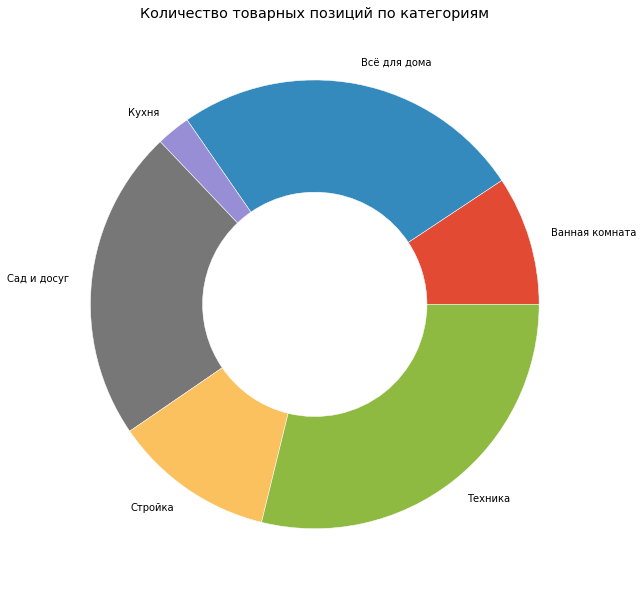

In [647]:
plt.figure(figsize = (9, 9))
dt_1.groupby('Category_1').count()['Name'].plot(kind='pie', wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Количество товарных позиций по категориям')
plt.ylabel('')
save_fig('Количество товарных позиций по категориям')
plt.show()

Saving figure boxplot


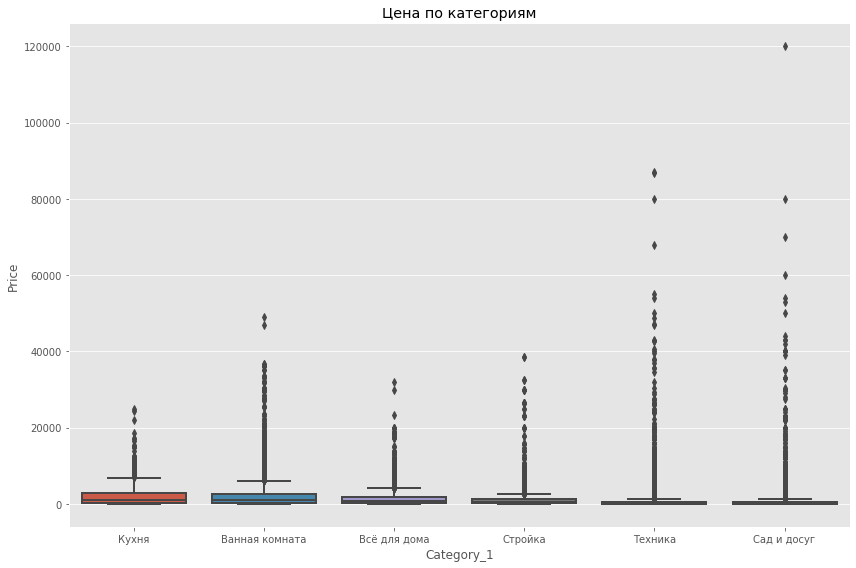

In [648]:
plt.figure(figsize = (12, 8))
sns.boxplot(x="Category_1", y="Price", 
            data=dt_1)
plt.title('Цена по категориям')
save_fig('boxplot')
plt.show()

In [649]:
dt_1['Log_Price'] = np.log(dt_1.Price)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Saving figure boxplot_log


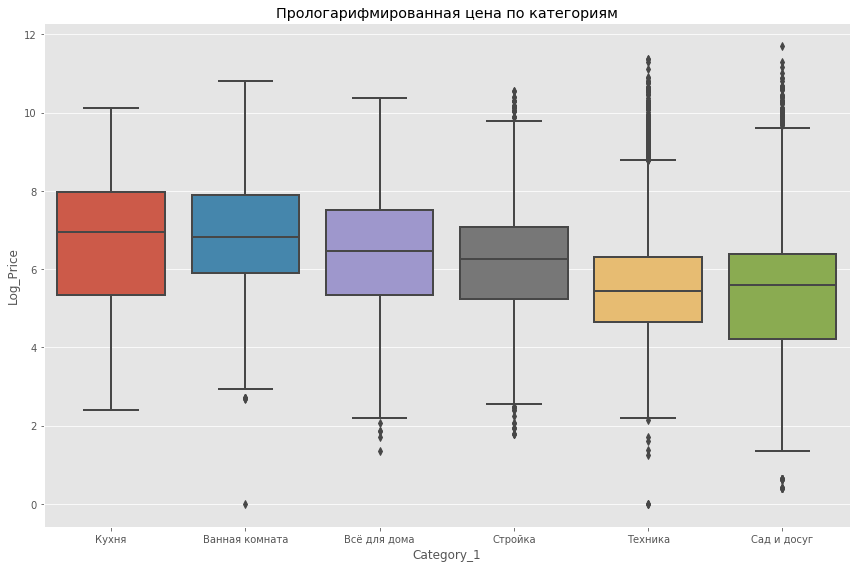

In [650]:
plt.figure(figsize = (12, 8))
sns.boxplot(x="Category_1", y="Log_Price", 
            data=dt_1)
plt.title('Прологарифмированная цена по категориям')
save_fig('boxplot_log')

plt.show()

Saving figure Log Price Dist


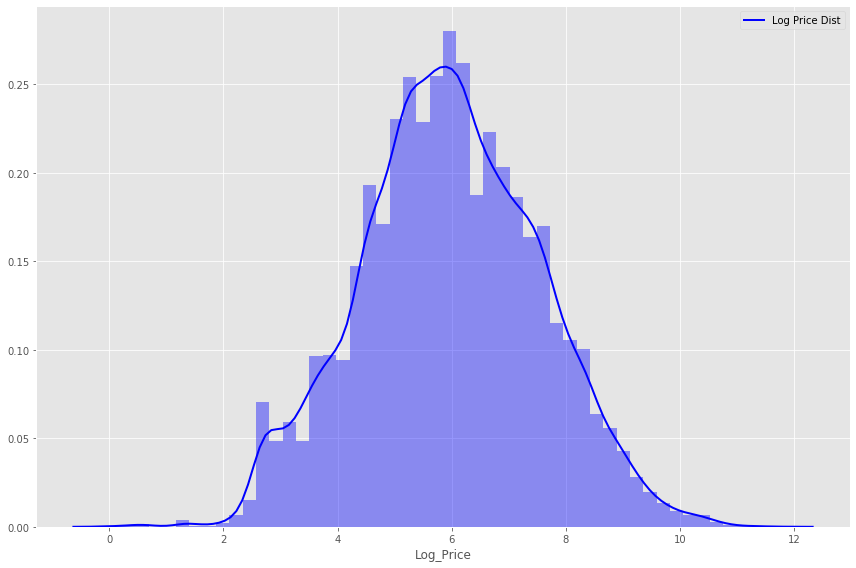

In [651]:
plt.figure(figsize = (12, 8))
sns.distplot(dt_1['Log_Price'], kde_kws={"label": "Log Price Dist"}, color='Blue')
save_fig('Log Price Dist')
plt.show()

Saving figure Price Dist


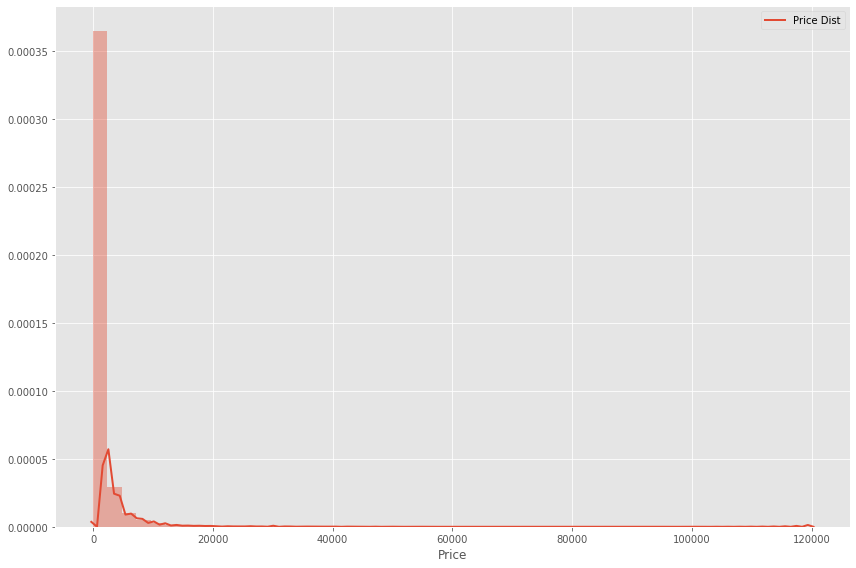

In [652]:
plt.figure(figsize = (12, 8))
sns.distplot(dt_1['Price'],  kde_kws={"label": "Price Dist"})
save_fig('Price Dist')
plt.show()

=========================================================================================================================

## 2. Кластерный анализ

In [654]:
dummy_dt = dt.drop(['Category_3', 'Category_4', 'Category_5', 'Category_6', 'Code', 'Name', 'Brand'], axis=1)

In [655]:
dummy_dt = pd.get_dummies(dummy_dt)
dummy_dt.shape

(104527, 88)

В идеале выборку бы разделить методом OneHot, однако в таком случае получается очень много колонок, что неудобно для анализа, а товары уже делятся между собой на категории-кластеры, поэтому лучше их не использовать.
В таком случае отдельно разберем числовые колонки, убрав колонку ```Code```, помешающую анализу. 

In [656]:
clust_df = dt.copy()

num = clust_df.columns[clust_df.dtypes != 'object'].drop('Code')

clust_df = clust_df[num]

clust_df.sample(5)

,Price,Old_Price,Stock,Region
88083,16.0,0.0,1,1
64389,0.0,0.0,0,0
65504,1129.0,0.0,1,1
86909,419.0,0.0,1,1
78007,249.0,0.0,1,1


In [657]:
clu = cluster_analysis(clust_df, 1)
clu_10000 = clu.sample(10000, random_state=42)

Создание линка на полный набор данных вызывало ```MemoryError```

In [658]:
link = linkage(clu_10000, 'ward', 'euclidean')

In [659]:
link[-20:, 2]

array([  7.39588951,   8.50547672,   8.6344303 ,   8.99243678,
         9.73654975,  10.99025117,  10.99806868,  12.76142234,
        16.75103936,  18.64980479,  21.19675455,  22.83010261,
        27.07746911,  36.55430827,  44.29338844,  57.24574437,
        85.92164213, 103.89828196, 107.0786392 , 172.68794756])

   ### Дендрограмма

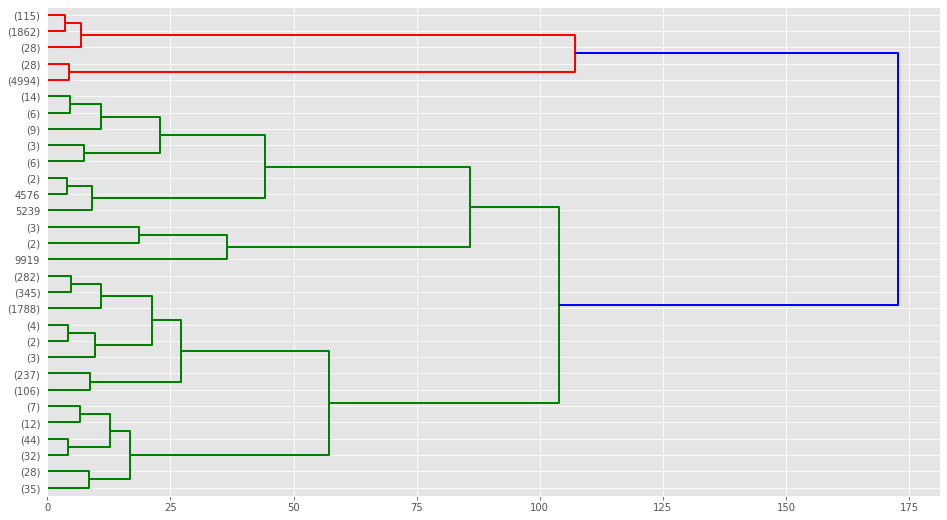

In [660]:
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

dn = dendrogram(link, truncate_mode='lastp', orientation='right')

### Построение каменистой осыпи

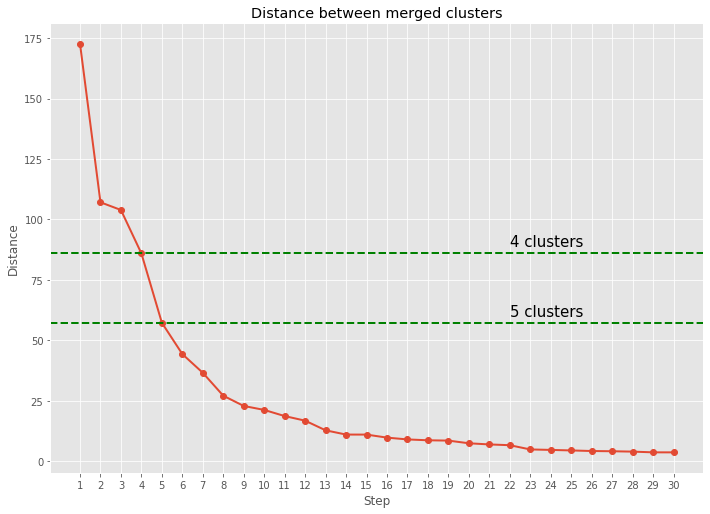

In [665]:
dist = link[-30:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(86, c='g', linestyle='dashed')
plt.axhline(57, c='g', linestyle='dashed')
plt.text(22, 89, '4 clusters', size = 15)
plt.text(22, 60, '5 clusters', size = 15)
plt.xticks(np.arange(min(idxs), max(idxs)+1, 1.0))
plt.show()

## Кластеризация методом k-means

In [666]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import time

In [675]:
def kmeans_analysis(df, step):
    
    columns = df.columns
    df_scaled = sc.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns = columns)
    
    if step==0:
        print('query: showing rows of scaled DataFrame')
        return df_scaled.sample(5)
    
    if step==1:
        print('query: correlation')
        return df_scaled.corr()
    
    if step==2:
        print('query: returning Elbow Method')
        K = range(1, 11)
        models = [KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in K]
        dist = [model.inertia_ for model in models]

        # Plot the elbow
        plt.plot(K, dist, marker='o')
        plt.xlabel('k')
        plt.ylabel('Sum of distances')
        plt.title('The Elbow Method showing the optimal k')
        return plt.show()
    
    a = int(input('Choose the amount of clusters, please: '))
    model = KMeans(n_clusters = a, random_state=42)
    model.fit(df)
    df_scaled['cluster'] = model.labels_
    df['cluster'] = model.labels_
    
    if step==3:
        print('n_clusters:', a)
        print("query: df.groupby('cluster').mean()")
        return df.groupby('cluster').mean()
    
    if step==4:
        print('n_clusters:', a)
        print("query: df_scaled.groupby('cluster').size()")
        return df_scaled.groupby('cluster').size()
    
    if step==5:
        print('n_clusters:', a)
        print("query: df_scaled['cluster'].sort_values()")
        return df_scaled['cluster'].sort_values()
    
    fig, axs = plt.subplots(nrows=int(a/2 + 0.5), ncols=2, sharex=True)
    fig.set_size_inches(16, len(df_scaled.columns) + 2)
    plt.subplots_adjust( wspace=0.625)
    k = 0
    c = ['grey', 'violet', 'salmon', 'skyblue', 'orange', 'red', 'yellow', 'blue', 'green', 'black']
    
    if step==6:
        for i in range(int(a/2 + 0.5)):
            for j in range(2):
                try:
                    ax = axs[i, j]
                    k += 1
                    df_scaled[df_scaled.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
                    ax.tick_params(labelsize = 11)
                except TypeError:
                    break
        save_fig('cluster')
        return plt.show()

In [668]:
kmeans_analysis(clust_df, 0)

query: showing rows of scaled DataFrame


,Price,Old_Price,Stock,Region
40969,-0.2,-0.0,-0.7,-1.0
18778,-0.0,-0.0,1.5,1.0
44035,-0.2,-0.0,-0.7,-1.0
48813,-0.2,-0.0,-0.7,-1.0
45800,-0.0,-0.0,1.5,1.0


In [669]:
kmeans_analysis(clust_df, 1)

query: correlation


,Price,Old_Price,Stock,Region
Price,1.0,0.1,0.3,0.2
Old_Price,0.1,1.0,0.0,0.0
Stock,0.3,0.0,1.0,0.7
Region,0.2,0.0,0.7,1.0


query: returning Elbow Method


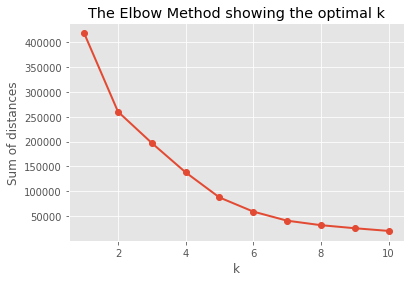

In [670]:
kmeans_analysis(clust_df, 2)

In [671]:
kmeans_analysis(clust_df, 3)

Choose the amount of clusters, please: 6
n_clusters: 6
query: df.groupby('cluster').mean()


,Price,Old_Price,Stock,Region
cluster,,,,
0,88.5,2.2,0.2,0.5
1,34957.1,806.6,0.8,1.0
2,7235.2,150.2,0.9,1.0
3,94040.0,0.0,0.6,1.0
4,2296.9,29.3,0.9,1.0
5,16939.5,162.3,0.9,1.0


In [672]:
kmeans_analysis(clust_df, 4)

Choose the amount of clusters, please: 6
n_clusters: 6
query: df_scaled.groupby('cluster').size()


cluster
0    96057
1      133
2     1552
3       12
4     6443
5      330
dtype: int64

In [673]:
kmeans_analysis(clust_df, 5)

Choose the amount of clusters, please: 6
n_clusters: 6
query: df_scaled['cluster'].sort_values()


0         0
66878     0
66877     0
66876     0
66875     0
         ..
100515    5
94063     5
22432     5
49898     5
92559     5
Name: cluster, Length: 104527, dtype: int32

Choose the amount of clusters, please: 6
Saving figure cluster


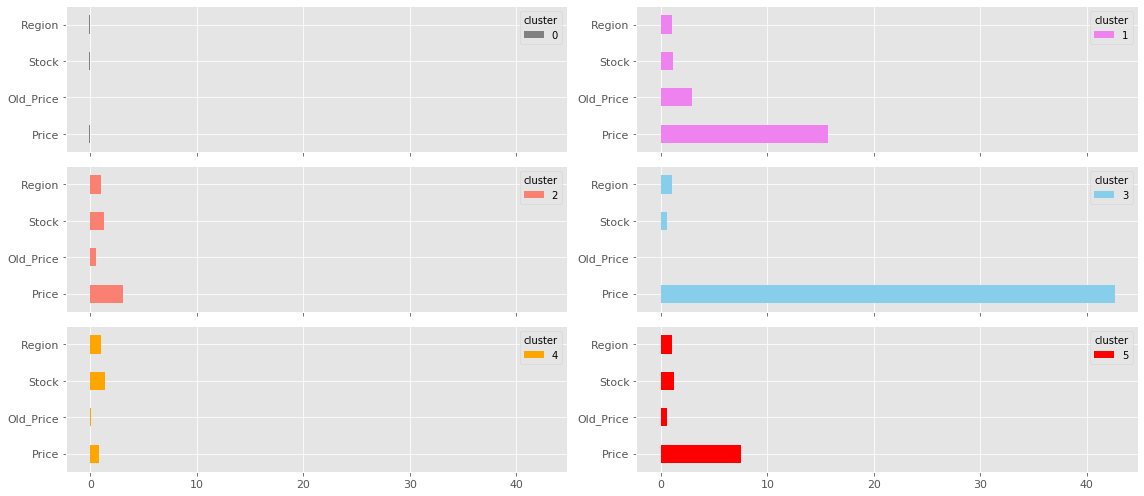

In [676]:
kmeans_analysis(clust_df, 6)

Как можно заметить, кластеры разбиты по достаточно простой схеме. В первом кластере у нас Санкт-Петербург, в остальных - Москва, где кластеры разбились по цене

## 3. Построение регрессии справедливой цены на товар

In [679]:
df_reg.sample(5)

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price,Stock,Region
11496,Сад и досуг,Товары для полива,Садовые шланги и аксессуары,Шланги для полива,-,-,2562213,"Комплект для подключения насоса с насадками 1""...",CMI,999.0,0.0,1,1
8892,Стройка,Древесно-плитные и пиломатериалы,Профилированные изделия,-,-,-,2366482,Наличник радиусный сосна 12 х 65 х 2200 мм,Без бренда,0.0,0.0,0,0
2065,Техника,Электроинструменты,Дрели и шуруповерты,Дрели ударные и безударные,-,-,1221563,"Дрель безударная Makita 6408, 530 Вт",Makita,2999.0,0.0,1,1
68273,Техника,Скобяные изделия и фурнитура,Гвозди и штифты,Стальные гвозди и штифты,-,-,4010831,Дюбель нейлоновый Европартнер MULTI Plug 6x25 ...,Европартнер,0.0,0.0,0,0
208,Всё для дома,Освещение,Наружное освещение,"Уличные фонари, столбы",-,-,1107713,Светильник уличный Duewi на пике 20 Вт,Unknown,0.0,0.0,0,0


In [686]:
df_reg.loc[73968, 'Region'] = 1
df_reg.loc[73969, 'Region'] = 0

In [695]:
df_filtered = df_reg[(df_reg.Region == 1) & (df_reg.Stock == 1)].drop(['Region', 'Stock'], axis=1)
df_filtered.shape

(31580, 11)

Далее мы будем смотреть товары только в Москве и только имеющиеся в наличии. Нет смысла содержать те значения, если они равны 0

In [690]:
df_filtered.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price,Stock,Region
27,Кухня,Оборудование для кухни,Фильтры для питьевой воды,Проточные фильтры и системы осмоса,-,-,1019363,Фильтр Гейзер ЗИВЖ Люкс проточный,Гейзер,3449.0,0.0,1,1
29,Ванная комната,Водоснабжение,Вентили,Шаровые краны,-,-,1019546,Кран для чистой воды Гейзер 3,Гейзер,1099.0,0.0,1,1
33,Всё для дома,Лакокрасочные материалы,Краски и грунтовки,Краски для внутренних работ,-,-,1028752,Краска для ванной комнаты и кухни Dulux Ultra ...,Dulux,989.0,0.0,1,1
35,Стройка,Строительные материалы,Кровля и водостоки,"Профнастил, металлочерепица, ондулин",-,-,1053057,Конек Ондулин красный 0.36 х 1 м,Ондулин,369.0,0.0,1,1
37,Стройка,Строительные материалы,Кровля и водостоки,"Профнастил, металлочерепица, ондулин",-,-,1053065,Конек Ондулин коричневый 0.36 х 1 м,Ондулин,369.0,0.0,1,1


In [700]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [701]:
df_labeled = df_filtered.copy()

In [707]:
categorical = df_labeled.columns[df_labeled.dtypes == 'object']
for col in categorical:
    df_labeled[col] = le.fit_transform(df_labeled[col])

In [828]:
for col in categorical:
    df2[col] = le.fit_transform(df2[col])

In [708]:
df_labeled.sample()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price
80245,1,10,235,0,0,1,4124194,21440,606,1119.0,0.0


In [745]:
df_labeled['Log_Price'] = np.log(df_labeled['Price'])

In [801]:
X = df_labeled.drop(['Price', 'Code', 'Name', 'Category_6', 'Log_Price'], axis=1)
y = df_labeled['Log_Price']

In [832]:
X.sample(1)

,Category_1,Category_2,Category_3,Category_4,Category_5,Brand,Old_Price
48772,1,10,335,0,0,432,0.0


In [833]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [834]:
print ('R^2: {0}'.format(model.score(X, y)))

R^2: 0.1769373063781926


In [835]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,7.8
1,Category_1,-0.2
2,Category_2,-0.0
3,Category_3,-0.0
4,Category_4,-0.0
5,Category_5,0.0
6,Brand,-0.0
7,Old_Price,0.0


In [836]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,7.8,0.0
1,Category_1,-0.2,0.0
2,Category_2,-0.0,0.0
3,Category_3,-0.0,0.0
4,Category_4,-0.0,0.0
5,Category_5,0.0,0.0
6,Brand,-0.0,0.0
7,Old_Price,0.0,0.0


In [837]:
import statsmodels.api as sm
#линейная регрессия
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:              Log_Price   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          2.245e+04
Date:                Mon, 23 Mar 2020   Prob (F-statistic):                        0.00
Time:                        19:12:55   Log-Likelihood:                         -74024.
No. Observations:               31580   AIC:                                  1.481e+05
Df Residuals:                   31573   BIC:                                  1.481e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [776]:
df_labeled.corr()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Code,Name,Brand,Price,Old_Price,Log_Price
Category_1,1.0,0.3,-0.0,0.1,0.2,-0.0,-0.2,-0.0,-0.0,-0.1,-0.0,-0.2
Category_2,0.3,1.0,0.1,0.4,0.3,-0.0,-0.2,0.0,-0.1,-0.0,0.0,-0.1
Category_3,-0.0,0.1,1.0,0.2,0.1,0.0,-0.0,0.2,-0.0,-0.1,-0.0,-0.1
Category_4,0.1,0.4,0.2,1.0,0.3,-0.1,-0.1,0.1,0.1,-0.1,-0.0,-0.3
Category_5,0.2,0.3,0.1,0.3,1.0,-0.0,-0.1,0.1,-0.0,-0.1,-0.0,-0.1
Category_6,-0.0,-0.0,0.0,-0.1,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0
Code,-0.2,-0.2,-0.0,-0.1,-0.1,-0.0,1.0,0.0,0.0,0.1,0.0,0.2
Name,-0.0,0.0,0.2,0.1,0.1,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0
Brand,-0.0,-0.1,-0.0,0.1,-0.0,0.0,0.0,-0.0,1.0,-0.1,-0.0,-0.3
Price,-0.1,-0.0,-0.1,-0.1,-0.1,0.0,0.1,-0.0,-0.1,1.0,0.1,0.6


In [763]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, max_depth=6, n_estimators=100)

In [764]:
rfr.fit(X, y)
rfr.feature_importances_

array([9.16157543e-02, 1.20083720e-01, 2.12430393e-01, 2.91094509e-01,
       2.76920334e-02, 2.32530276e-04, 2.54859939e-01, 1.99112049e-03])

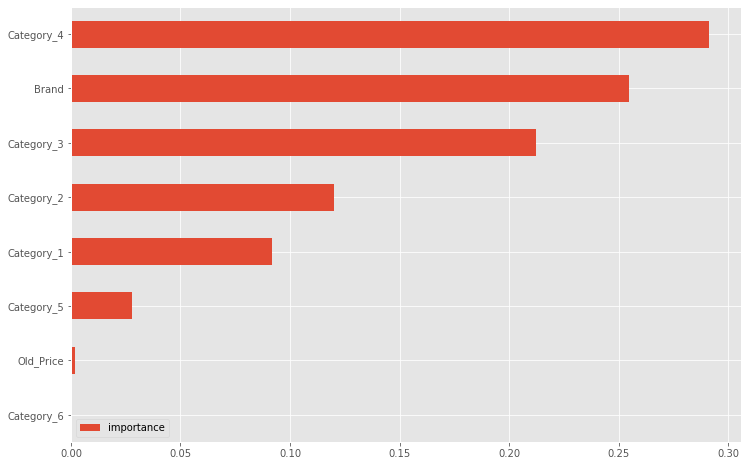

In [765]:
imp = pd.DataFrame(rfr.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [766]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [767]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [800]:
rmse = np.sqrt(mean_squared_error(y_valid, rfr.predict(X_valid))).round(2)
rmse

1.12

Посмотрим на примеры построенных прогнозов цен моделью Random Forest

In [797]:
prediction = pd.DataFrame()
prediction['pred_log'] = rfr.predict(X)
prediction['fact_log'] = y.reset_index().Log_Price

In [798]:
prediction['pred'] = np.exp(prediction['pred_log'])
prediction['fact'] = np.exp(prediction['fact_log'])

In [799]:
prediction.head(17).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
pred_log,6.9,7.1,6.4,5.2,5.2,5.2,5.2,5.2,5.2,6.0,6.0,5.6,5.6,5.6,6.0,6.0,6.0
fact_log,8.1,7.0,6.9,5.9,5.9,5.9,5.9,5.9,5.9,5.3,5.8,5.9,4.9,4.7,5.4,5.3,5.7
pred,976.6,1195.8,589.9,174.4,174.4,174.4,174.4,174.4,174.4,398.8,398.8,283.8,257.9,257.9,398.8,398.8,398.8
fact,3449.0,1099.0,989.0,369.0,369.0,369.0,369.0,369.0,369.0,199.0,335.0,379.0,129.0,109.0,229.0,199.0,309.0


Линейная модель полученная методом RFR показала неплохие результаты. 
Заметим, что переменная с типом ритейлера оказалась статистически незначимой, поэтому стоит исключить ее из рассмотрения.
Воспользуемся еще методами Lasso и Ridge для сравнения результатов.

In [802]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

In [803]:
lasso_regressor = Lasso(random_state = 1)
lasso_regressor.fit(X, y)
lasso_predictions = lasso_regressor.predict(X)

In [805]:
rmse = np.sqrt(mean_squared_error(y, lasso_predictions.astype(int))).round(2)
print(f'RMSE = {rmse}')

RMSE = 1.56


In [807]:
score = lasso_regressor.score(X, y)
print('R^2 = {}'.format(score))

R^2 = 0.13239170882781393


In [816]:
ridge_regressor = Ridge(random_state = 1)
ridge_regressor.fit(X, y)
ridge_predictor = ridge_regressor.predict(X)

In [823]:
rmse = np.sqrt(mean_squared_error(y, ridge_predictor)).round(2)
print(f'RMSE = {rmse}')

RMSE = 1.42


In [824]:
score = ridge_regressor.score(X, y)
print('R^2 = {}'.format(score))

R^2 = 0.17693730637211802


Ансамблевый метод Случайный Лес оказался лучше

# Выводы
В рамках проведенной работы были собраны данные о товарных позициях магазина OBI. Каждая имела следующие характеристики:

- Категория товара
- Код товара
- Название товара
- Производитель товара
- Цена товара (обновленная)
- Старая цена товара
- Наличие товара в магазине (на складе)
- Ссылка на товар
- Дата обновления информации
- Регион (Город)

Собранные данные были приведены к необходимому для анализа виду. Колонка категорий была разделена на 6 подкатегорий. Некоторые строки решено было удалить. 

Были построены графики, которые помогли понять природу и количество данных и зависимость данных друг от друга.

Данные были кластеризованы методом Kmeans. Количество выделенных кластеров - 6. 

К имеющимся данным была применена линейная регрессия для предсказания цены автомобиля по имеющимся параметрам. Были рассмотрены 4 модели: OLS, Random Forest, Lasso, Ridge. Лучше всех показала себя модель случайного леса. Полученные коэффициенты в модели говорят нам о том, что главные факторы, влияющие на цену товара - это бренд и подкатегории товара. 